<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Model

## Introduction

The structure of this thesis is as follows. In section 2 of part 1, the model considered in this thesis and its important aspects are explained. In part 2 simulating from this statistical model is discussed in detail. In part 3 the model under dynamic strategies is considered and comparisons are drawn with the static case. In part 4 we entertain violations of positivity in the data, this section represents the novelty in this thesis. Part 5 applies what has been learnt to an oncology application. Part 6 includes a discussion, conclusions and suggestions for future work.


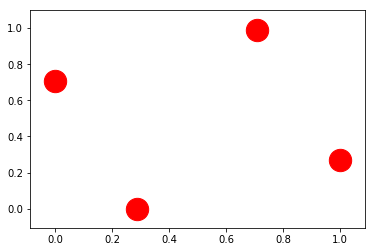

In [16]:
# DAG diagram
G.clear()
import networkx as nx
G=nx.Graph()
G.add_nodes_from(["A", "B", "C", "D"])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
plt.show()
G.clear()

### Statistical Model - Marginal Structural Models.

- define the type of covariates
- continuous covariate
- binary treatment
- binary outcome

We consider simulating from marginal structural models, a recent class of models that can be used to estimate causal effects from observational data under time dependent confounding. Specifically, we consider the problem of simulating longitudinal data from a follow-up study where a treatment variable $A$ has a causal effect on an outcome of interest $Y$. We use the following definition from Pearl 2010 to define a causal effect:

**Definition 1.1**: (Def 3.2.1 from Pearl 2010) Given two disjoint sets of variables, X and Y, the causal effect of $X$ on $Y$, denoted as $P(y\ |\ do(x))$, is a function from X to the space of probability distributions on $Y$. For each realization $x$ of $X$, $P(y\ |\ do(x))$ gives the probability that $Y=y$ induced by deleting from the model all equations corresponding to variables in $X$ and substituting $x$ into the remaining equations.

A model that parameterises $P(y\ |\ do(x))$ is called a marginal structural model (MSM) as it is marginal over any covariates and structural in the sense that it represents an interventional rather than observational model. The latter point is expressed in definition 1.1 through the notation $do(a)$ in $P(y\ |\ do(x))$, as opposed to the observational $P(y\ |\ X=x)$. In the former case the variable X is forced to take on a particular value or history, so that the model represents the behaviour of a system under the forced intervention $do(X=x)$ (pearl 2010). On the other hand the first method represents the situation where the model is unchanged and X is oserved to be x. This distinction has important consequences when we consider the difference between static and dynamic stratgeies in a later section. 

**Time Dependent Confounding**

In the absence of confounding an association model such as a logistic model, or a cox-proportional hazards model has a causal interpretation. In this case the interventional and associational models yield the same results: $P(Y\ |A=a)=P(Y|A=do(a))$. A time dependent confounder is a risk factor or covariate that is both a cause of the When there is confounding this relationship no longer holds. In our setting we have a time dependent confounder $L$ which represents a risk factor for the outcome of interest $Y$ and is the same time a predictor of later exposure to the treatment $A$. Additionally in our case past exposure to treatment may also affect the risk factor $L$. 

The time dependent confounding becomes a problem because the confounder then depends on both the previous treatment and the previous treatment depends on the confounder. There is always confounding in this case (Hernan, Robins 2004) caused by selection bias. 

- difference between normal confounding and time dependent case
In both cases there can be confounding, but in the first case we can use regression asjustment methods. in the second case we can use IPT weights only.
- link to longitudinal setting by this point so as not to redo any parts for the longitudinal setting.

L{k} may be a confounder for later treatment and must be adjusted for, And $L_{k}$ may be affected by earlier treatment and therefore should not be adjusted by standard methods Robins(2000)

A covariate $L$ is a confounder if it predicts the event of interest and is a also predicts subsequent exposure.

**Inverse Probability Weighting**

Even when there is confounding, it is possible to fit an unbiased model using inverse probability of treatment (IPT) weights. If there are no unmeasured confounders we can adjust for confounding (Robins 2000). The denominator ofthe weights is informally the probability that a subject has his/her own observed treatment. The effect of weighting is to create a pseudo population consisting of $w_i$ copies of each subject $i$. In the pseudo population A is not confounded with L. Second the probability that Y = 1 conditional on either treatment is the same as the true population values (Robins 2000).

- Specify that the weights only work when positivity is assumed. We look at violations of positivity, so if positivity is not assumed then we are showing that the weights don;t work and hence the method of MSMs don't work and we don;t recover the correct parameters in the simulation.
- Talk about the pseudo population as a way of explaining what the weights do. 

As these weights have high instability we need to stabilize them. The unstabilized weights can be driven by only a small number of observations.
Under time dependent confounding it may still be possible to recover the causal effect of $A$ on $Y$ by the method of Inverse Probability of Treatment (IPT) weighting. How does this work?

- true weights are unknown but can be estimated from the data.
- Robins(2000) - when there are no unmeasured confounders, we can control for confounding using weights

- $A_t$ is no longer affected by $L_t$, and crucially the causal effect of $\bar A$ on $Y$ remains unchanged

No unmeasured confounding
time dependent confounding in the set-up we consider, will always introduce  bias. In the time dependent case, we will therefore always have bias. And IPT weighting a means of avoiding this.

treatment increases/imporves L and this in turn affects the probaility of getting treatment A. 

lack of adjustment for L precludes unbiased estimation. This is because it introduces selection bias.

Problem is that the weights will have very high variability, so we need to stabilize them otherwise they will affect the estimates. Explain all the little details about why it becomes more variable etc.
IPTW is a method of correcting for time dependent confounding when fitting marginal structural models. 

How does IPTW deal with time confounding

**Positivity**

We need to be able to estimate the average causal effect in every stratum of the confounders. Positivity is the condition that there are both exposed and unexposed individuals at every level of the confounders (Cole, Hernan, 2008). If positivity is violated because doctors have protocols to treat patients when L falls below a certain level, then positivity is violated. If the structural bias occurs within levels of a time-dependent confounder then restriction or censoring may lead to bias whether one uses weighting or other methods (Cole and Hernan 2008). In fact, weighted estimates are more sensitive to random zeroes (Cole, Hernan, 2008)

**Definition 2: positivity** (Appendix 2 Cole and Hernan 2008): Positivity states that there is a non-zero (i.e. positive) probability of receiving every level of exposure $X_{ij}$ for every combination of values of exposure and covariate histories that occur in individuals histories.

In section V we will consider violations of positivity to examine the extent of the bias introduced into the estimates when the assumption of positivity is not met. The inverse probability weights are equal to the stanilized weights, only if positivity holds. If positovity does not hold, the weights are undefined and may result in biased estimates of the causal effects. 

As described above, the model only holds as long as key assumptions are met, and one of these is positivity. Introducing violations of positivity can be achieved by censoring observations.



- Point out difficulty in simulation from this model.
- talk about blocking a back door from U to Y?
- Introduce bar notation for treatment histories. 
- Why is it a causal model?
- need to mention positivity because this will be the novelty in the paper.
- What does Robins say about this?
- What is an external intervention?
- represented as a DAG? Can also include a section on DAG diagrams.
- Pearl and Robins (1995) probabilistic evaluation of sequential plans from causal models with hidden variables.
- Why do we delete the equations? Give explanation. probs DAG
- When defining the external intervention, need to make it clear what this means, in such a way the it makes exposition of the dynamic part more obvious.
- time dependent case.
- how do we move to from the one shot case of the algorithm to the time dependent part.
- explain that we can have covariates in this model and that this links to the time dependent covariate case.

**Literature Review/related work**

- G formula simulation
- exposure, confounder feedback loop
- treatment
- outcome variable
- causal effect of the treatment variable on the outcome. 
- external intervention
- Explain the do notation, and what presicely is meant in the case  
- used to estimate the joint effect of time dependent treatments on survival
- Need to stronly link the time dependent confounding to the MSM, do we choose this class of models because of their relationship with time dep confounding? Yes, marginal strictural models are used with TDC
- The causal graph helps (according to Pearl pp. 40) to bridge statistics into causality
- There is a key part to this, which is that we do not observe confounding, this seems to be what motivates the use of the MSM class of models.
- Counterfactuals need to be addressed here to make it clear this is not the purpose of the thesis.

- Robins (2000) have demonstrated that in the presense of time dependent confounders, standard approaches for asjusting for confounding are biased.
- A covariate that is a risk factor for, or predictor of the event of interest (Y) (from Robins 2000). This defines a time dependent covariate
- And also past exposure determines the level of the covariate.
- Works under a set of assumptions (consistency, exchanchability, positivity and no mispecification of the model used to estimate the weights
- 

**2.2.2 positivity and positivity violations**


**2.4 Static vs. Dynamic Strategies**

So far we have considered static strategies, in this section we desbcribe the differences between static and dynamic strategies. A static stratgey is one where the value where the values that $A$ will take depend on  for A is represented as:

$$\bar a = {a(0), a(1), \hdots, a{K}$$

Where a(t) = 1 if the strategy specifies that a is to take the value 1 at time $t$. In contrast, a dynamic regime is any well-specified way of adjusting the choice of the next decision(treatment or dose to administer) in the light of previous information constitutes a dynamic decision (or treatment) strategy (Didelez arxiv).

To our knowledge positivity violations in the dynamic case have not been considered in the literature.

Hernan eta l (2005) for looking at comparing dynamic regimes using artificial censoring.

**Motivation**

Positivity masking study


# Static Case

## Data Structure

We wish to simulate survival data in discrete time $t = 0, \dots, T$ for $n$ subjects. At baseline $t=0$ all subjects are assumed to be at risk of failure so that $Y_0 = 0$. For each time period $t = 0, \dots, T$ a subject may either be on treatment so that $A_t = 1$ or not on treatment so that  $A_t = 0$. Once a patient commences treatment, they remain on treatment in all subsequent periods until failure or the end of follow-up. In each time period the $L_t$ is the value of a covariate measured at time $t$. In our simulated data $L_t$ represents a covariate similar to CD4 counts so that a low value of $L_t$ represents a more severe illness and hence a higher probability of failure in the following period. Each time period is either a check up visit or is between two check up visits. If $t$ is a check-up visit and treatment has not yet commenced, $L_t$ is measured and a decision is made on whether to commence treatment. Between visits, treatment remains unchanged at the value recorded at the previous visit. Similarly, $L_t$ which is only measured when $t$ is a visit, alos remains unchanged.

We represent the history of a random variable with an over bar. For example, the vector representing the treatment history of the variable A is represented by $\bar A = [a_0, a_1, \dots, a_m]$ where $m=T$ if the subject survives until the end of follow-up, or $m < T$ otherwise. Prior to basline both $A = 0$ for all subjects.

- if treatment has been commenced then a subject may feel extra benefit if more time has elapsed since treatment began
- explain what $U$ is and how it relates to the simulation design/algorithm
- Be more specific on 

## Simulation Algorithm

** Algorithm **

** Discussion of how algorithm works **

## Constructing IPT weights

Inverse Probability of Treatment weights can be used to adjust for measured confounding and selection bias in marginal structural models. Link back to pseudo population idea in previous section. This method relies on four assumptions consistency, exchangeability, positivity and no mispecification of the model used to estimate the weights (Cole, Hernan, 2008). Unstabilized weights are defined as:

$$w_{t,i} = \frac{1}{\prod_{\tau=0} ^ t p_{\tau} (A_{\tau, i}\ |\ \bar A_{\tau-1, i}, \bar L_{\tau, i})}$$ 

Where the denominator is the probability that the subject received the particular treatment history that they were observed to receive up to time $t$, given their prior observed treatment and covariate histories (Havercroft, Didelez, 2012). The probabilities $p_{\tau} (A_{\tau, i}\ |\ \bar A_{\tau-1, i}, \bar L_{\tau, i})$ may vary greatly between subjects when the covariate history is strongly asscoaited with treatment. In terms of the resulting pseudopopulation, very small values of the unstabilized weights for some subjects would result in a small number of observations dominating the weighted analysis. The result is that the IPTW estimator of the coefficients will have a large variance, and will fail to be normally distributed. This variability can be mitigated by using the following stabilized weights 

$$sw_{it} = \frac{\prod_{\tau=0} ^ t p_{\tau} (A_{\tau, i}\ |\ \bar A_{\tau-1, i})} {\prod_{\tau=0} ^ t p_{\tau} (A_{\tau, i}\ |\ \bar A_{\tau-1, i}, \bar L_{\tau, i})}$$ 

In the case that there is no confounding the denominator probabiliies in the stabilized weights reduce to $p_{\tau} (A_{\tau, i}\ |\ \bar A_{\tau-1, i})$ and $sw_{it}=1$ so that each subject contributes the same weight. In the case of confounding this will not be the case and the stabilized weight will vary around 1. 

In practice, we estimate the weights from the data using a pooled logistic model for the numerator and denominator probabilities. The histories of the treatment and covariates are included in the probabilities. In practice Specifically, following Havercroft and Didelez (2012), we estimate the model where the visit is only the visits every check up time. Between check ups both the treatment and covariate remain the same. Other ways of doing this include a spline function over the months to create a smooth function between the visits. Another difference might be to use a coxph function instead of logistic function

$$logit\ p_{\tau} (A_{\tau, i}\ |\ \bar A_{\tau-1, i}, \bar L_{\tau, i}) = \alpha_0 + \alpha_1 k + alpha_2 a_{k-1} + \dots + alpha_k a_0 + $$

We have several options for estimating these weights. We could use a coxph model, or a logistic model.


## Simulation Set-up

We follow the simulation set-up of Havercroft, Didelez (2012) which is based on parameters that closely match the Swiss HIV Cohort Study (HAART). 




## Results


# Dynamic Case

**3.1 The problem of simulating from a MSM under a dynamic strategy**

# Violations of Positivity

** Extended discussion of algorithm linking to positivity **

As described in the introduction, one assumption of the model is that there is a non-zero probability of the event occuring at every startum of the covariate.

- When previous covariates like CD4 count are strongly associated with treatment the probabilities in the denominator of the ustabilized weights may vary greatly. Because we are foricing positivity by using a treatment rule when L falls below a threshold and A is then eaual to one, we create a strong association between A and L -> hence the unstabilized weights would vary. (Robins et al 2000 pp. 553)

# Application

# Discussion and Conclusion

<cite data-cite="granger2013">(Granger, 2013)</cite>

# References

